<center><h2>Line detection in recovered EPIs </h2></center>

In [1]:
# Import the libraries to use
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import time
%matplotlib inline

In [2]:
from PIL import Image

In [7]:
name = '../EPIs_Strips/Inpainted/673_10_102_4_48_8_inpainted.png';
img = cv2.imread(name)

### Hough Transform in OpenCV

In [155]:
img = cv2.imread(name)
img_lines = cv2.imread(name)
gray = cv2.cvtColor(img_lines,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    if (y2-y1)/(x2-x1)!=0:
        cv2.line(img_lines,(x1,y1),(x2,y2),(0,0,255),2)

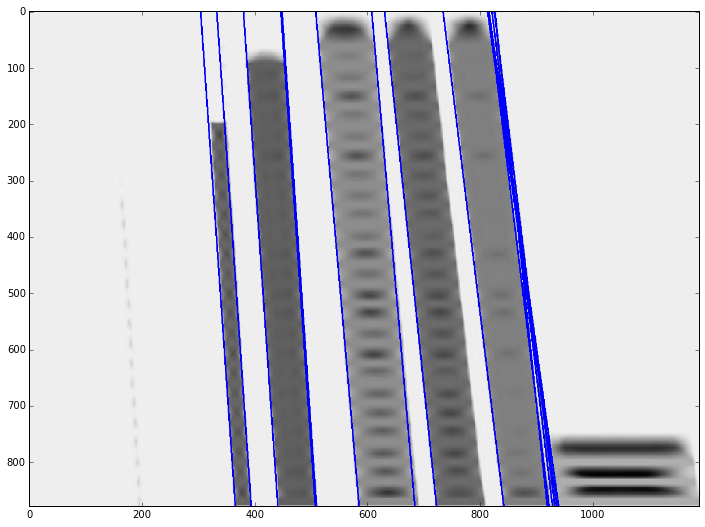

In [156]:
plt.rcParams["figure.figsize"] = [12,9]
plt.imshow(img_lines)
plt.show()

Now we want to compute the slope of the lines.

In [157]:
def slope(lines,i):
    line = lines[i]
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    slope = -abs((y2-y1)/(x2-x1))
    return slope,x1,x2,y1,y2

In [158]:
img = cv2.imread(name)
i = 0
slopei,x1,x2,y1,y2 = slope(lines,i);

In [159]:
slopei

0

In [160]:
cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2);

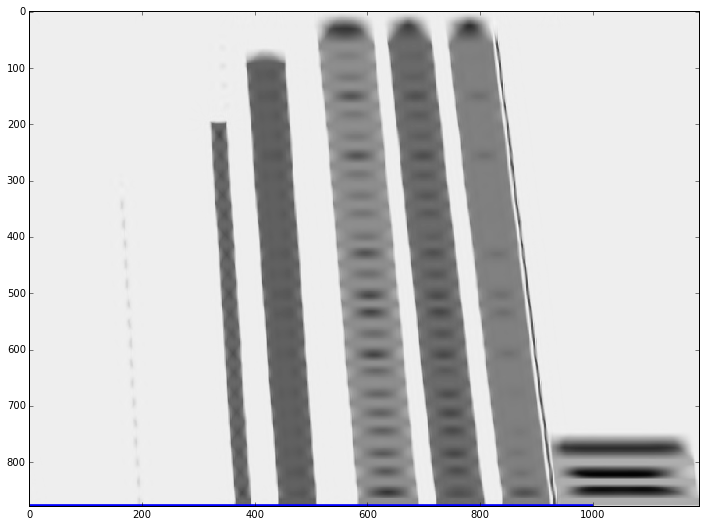

In [161]:
plt.imshow(img)